# LGMVIP DATA SCIENCE
# AUTHOR - PUJAN BOSE
# TASK - Next Word Prediction 


## 1. Installing the libraries

In [1]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install nltk

## 2. Importing the libraries

In [2]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq


## 3. Loading the dataset

In [3]:
path = '1661-0.txt'
text = open(path).read().lower()
print('corpus length:', len(text))


corpus length: 581888


## 4. Splitting the entire dataset into each word in order without the presence of special characters

In [4]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

## 5. Dictionary(<key: value>) with each word form the unique_words list as key and its corresponding position as value

In [5]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

## 6. Feature engineering

In [6]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


## 7. One-Hot encoding

In [7]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [ ]:
print(X[0][0])

[False False False ... False False False]


## 8. Building the model

In [8]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

## 9. Training

In [17]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
811/811 [==============================] - 185s 226ms/step - loss: 4.9602 - accuracy: 0.2857 - val_loss: 8.4565 - val_accuracy: 0.0970
Epoch 2/10
811/811 [==============================] - 178s 219ms/step - loss: 4.6376 - accuracy: 0.3281 - val_loss: 8.6905 - val_accuracy: 0.0842
Epoch 3/10
811/811 [==============================] - 177s 218ms/step - loss: 4.4276 - accuracy: 0.3676 - val_loss: 9.0583 - val_accuracy: 0.0817
Epoch 4/10
811/811 [==============================] - 177s 219ms/step - loss: 4.2731 - accuracy: 0.4005 - val_loss: 8.9268 - val_accuracy: 0.0857
Epoch 5/10
811/811 [==============================] - 178s 219ms/step - loss: 4.1585 - accuracy: 0.4302 - val_loss: 9.1003 - val_accuracy: 0.0815
Epoch 6/10
811/811 [==============================] - 179s 221ms/step - loss: 4.0426 - accuracy: 0.4580 - val_loss: 9.0984 - val_accuracy: 0.0731
Epoch 7/10
811/811 [==============================] - 178s 220ms/step - loss: 3.9590 - accuracy: 0.4804 - val_loss: 9.1551 -

## 10. Saving the model and loading it back

In [18]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))


In [19]:
history

{'accuracy': [0.28571978211402893,
  0.32805830240249634,
  0.3675922155380249,
  0.4004664719104767,
  0.43023738265037537,
  0.4579940140247345,
  0.4804113507270813,
  0.5009204149246216,
  0.51833575963974,
  0.5337368249893188],
 'loss': [4.960208415985107,
  4.637572288513184,
  4.427563190460205,
  4.273090839385986,
  4.158470153808594,
  4.042626857757568,
  3.958982229232788,
  3.892402172088623,
  3.842939853668213,
  3.782714366912842],
 'val_accuracy': [0.09703405201435089,
  0.08421823382377625,
  0.08165507018566132,
  0.08568289875984192,
  0.0814719870686531,
  0.07305016368627548,
  0.07323324680328369,
  0.0714024156332016,
  0.06627608835697174,
  0.06883925199508667],
 'val_loss': [8.456538200378418,
  8.690515518188477,
  9.058286666870117,
  8.926826477050781,
  9.100311279296875,
  9.09841251373291,
  9.155068397521973,
  9.255380630493164,
  9.21721076965332,
  9.324771881103516]}

## 11. Evaluation

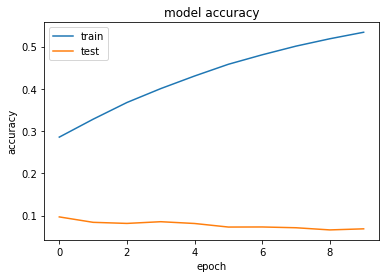

In [20]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')



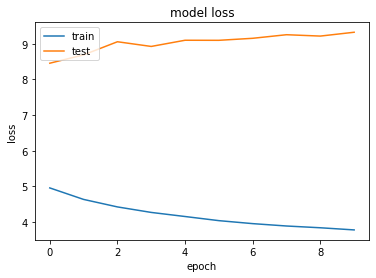

In [21]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## 12. Prediction

In [22]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [23]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [24]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [36]:
q =  "There is nothing more deceptive than an obvious fact"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))


correct sentence:  There is nothing more deceptive than an obvious fact
Sequence:  there is nothing more deceptive
there
is
nothing
more
deceptive
next possible words:  ['than', 'be', 'but', 'once', 'no']
